# Numerical Integration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Initial Value Problem

An initial value problem (IVP) for a given differential equation:
\begin{equation}
\dot{x} = h(x(t), t),
\end{equation}
and initial condition $x(0)$ is to solve for the trajectory $x(t)$ that satisfies the differential equation starting from $x(0)$.

#### Example: Simple IVP

Consider the simple initial value problem with:
\begin{equation}
\dot{x} = x \sin^2(t), \quad x(0) = 1,
\end{equation}
which has an analytical solution:
\begin{equation}
    x(t) = x_0 \exp\left( \frac{t - t_0 - \sin(t-t_0)\cos(t+t_0)}{2} \right),
\end{equation}
which for the provided initial condition simplifies to:
\begin{equation}
x(t) = \exp\left( \frac{t - \sin(t) \cos(t)}{2} \right).
\end{equation}
Our goal is to develop a numerical integration scheme which can approximate this solution. We can define the IVP using the code below:

In [2]:
# Define the derivative function h(x, t)
def h(x, t):
    return x * np.sin(t) ** 2

# Define initial conditions
x0 = np.array([1.0]) # Initial state x(t0)
t0 = 0.0 # Initial time t0
tf = 10.0 # Final time tf

## Numerical Integration Schemes

There are many methods for numerical integration, with varying degrees of accuracy and computational intensity. One of the simplest integration schemes is the Euler method, which uses the update formula:
\begin{equation}
x(t + \Delta t) = x(t) + \Delta t \cdot h(x(t), t),
\end{equation}
to integrate the ordinary differential equation:
\begin{equation}
\dot{x} = h(x(t), t).
\end{equation}

To implement such a numerical integration scheme to solve an initial value problem (IVP), we start with a simple for-loop that computes a sequence of single-step updates. See the function `integrate` defined below.

In [3]:
def integrate(h, x0, t, method, **kwargs):
    """
    Perform numerical integration of ̇x = h(x,t) from initial state x0.

    Parameters
    ----------
    h : function to integrate, h(x, t, **kwargs)
    x0 : initial state vector
    t : time vector [t0, t0 + Δt, ..., T] 
    method : integration method function, integrator (h, x, t, Δt, **kwargs) 
    kwargs : key word args to pass to h

    Returns
    -------
    x : state vector for times t
    """
    x = np.zeros((t.size, x0.size))
    x[0] = x0
    for i in range(t.size - 1):
        Δt = t[i+1] - t[i]
        x[i + 1] = method(h, x[i], t[i], Δt, **kwargs)
    return x

We can now implement the Euler, midpoint, and fourth-order Runge-Kutta methods that we can pass to `integrate`. The midpoint method and the fourth-order Runge-Kutta (RK4) method are two alternatives to the Euler method with better accuracy.

In [4]:
def euler(h, x, t, Δt, **kwargs):
    """
    Perform Euler integration step of ̇x = h(x,t)

    Parameters
    ----------
    h : function to integrate, h(x, t, **kwargs)
    x : state vector
    t : time
    Δt : time step to integrate over
    kwargs : key word args to pass to h

    Returns
    -------
    x[t + Δt] : state vector at t + Δt
    """
    return x + Δt*h(x, t, **kwargs)

In [5]:
def midpoint(h, x, t, Δt, **kwargs):
    """
    Perform midpoint integration step of ̇x = h(x,t)

    Parameters
    ----------
    f : function to integrate, h(x, t, **kwargs)
    x : state vector
    t : time
    Δt : time step to integrate over
    kwargs : key word args to pass to h

    Returns
    -------
    x[t + Δt] : state vector at t + Δt
    """
    t_mid = t + Δt/2
    x_mid = x + (Δt/2)*h(x, t)
    return x + Δt*h(x_mid, t_mid, **kwargs)

In [6]:
def rk4(h, x, t, Δt, **kwargs):
    """
    Perform fourth-order Runge-Kutta integration step of ̇x = h(x,t)

    Parameters
    ----------
    h : function to integrate, h(x, t, **kwargs)
    x : state vector
    t : time
    Δt : time step to integrate over
    kwargs : key word args to pass to h

    Returns
    -------
    x[t + Δt] : state vector at t + Δt
    """
    k1 = h(x, t, **kwargs)
    k2 = h(x + (Δt/2)*k1, t + Δt/2, **kwargs)
    k3 = h(x + (Δt/2)*k2, t + Δt/2, **kwargs)
    k4 = h(x + Δt*k3, t + Δt, **kwargs)
    return x + (Δt/6)*(k1 + 2*k2 + 2*k3 + k4)

### Solving the Simple IVP
We can now solve the IVP from the simple example above using the Euler, midpoint, and fourth-order Runge-Kutta methods and compare against the analytical solution to see the differences in their accuracy.

Run the code below to compare the numerical and analytical solutions to the IVP. Try playing with the $\Delta t$ parameter to see how the numerical method's accuracy varies.

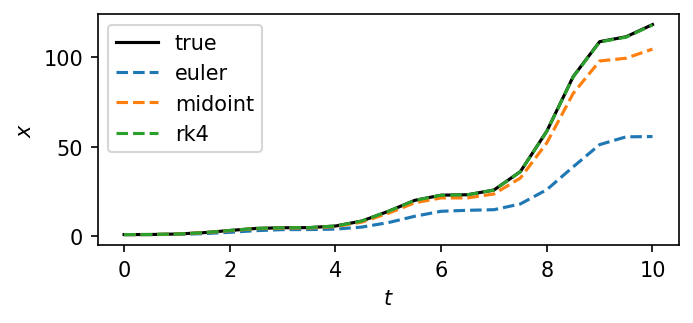

In [7]:
Δt = 0.5 # Discretization step
t = np.arange(t0, tf + Δt, Δt) # Array of timestamps

# Compute analytical solution
x_true = x0*np.exp(((t-t0) - np.sin(t-t0)*np.cos(t+t0))/2)

# Test Euler method
x_euler = integrate(h, x0, t, euler)

# Test midpoint method
x_midpoint = integrate(h, x0, t, midpoint)

# Test RK4 method
x_rk4 = integrate(h, x0, t, rk4)

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(5, 2), dpi=150)
ax.plot(t, x_true, 'k', label='true')
ax.plot(t, x_euler, '--', label='euler')
ax.plot(t, x_midpoint, '--', label='midoint')
ax.plot(t, x_rk4, '--', label='rk4')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()
plt.show()